<a href="https://colab.research.google.com/github/Gopizone/DataScience/blob/main/Basic_Neural_Networks_(fashion_mnist).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras


(x_train,y_train),(x_val,y_val) = keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [2]:
def preprocess(x, y):
    x = tf.cast(x, tf.float32) / 255.0
    y = tf.cast(y, tf.int64)
    return x, y

def create_dataset(xs, ys, n_classes=10):
    ys = tf.one_hot(ys, depth=n_classes)
    return tf.data.Dataset.from_tensor_slices((xs, ys)).map(preprocess).shuffle(len(ys)).batch(128)

In [3]:
train_data_set = create_dataset(x_train,y_train)
validation_data_set = create_dataset(x_val,y_val)

In [4]:
model = keras.Sequential([
    keras.layers.Reshape(target_shape=(28 * 28,), input_shape=(28, 28)),
    keras.layers.Dense(units=256, activation='relu'),
    keras.layers.Dense(units=192, activation='relu'),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dense(units=10, activation='softmax')
])

In [5]:
model.compile(optimizer='adam', 
              loss=tf.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])



history = model.fit(
    train_data_set.repeat(), 
    epochs=10, 
    steps_per_epoch=500,
    validation_data=validation_data_set.repeat(), 
    validation_steps=2
)

Epoch 1/10
500/500 [==============================] - 8s 10ms/step - loss: 0.6591 - accuracy: 0.7737 - val_loss: 0.4543 - val_accuracy: 0.8398
Epoch 2/10
500/500 [==============================] - 5s 9ms/step - loss: 0.3643 - accuracy: 0.8660 - val_loss: 0.3802 - val_accuracy: 0.8555
Epoch 3/10
500/500 [==============================] - 5s 9ms/step - loss: 0.3207 - accuracy: 0.8812 - val_loss: 0.2984 - val_accuracy: 0.8945
Epoch 4/10
500/500 [==============================] - 5s 9ms/step - loss: 0.2937 - accuracy: 0.8911 - val_loss: 0.4504 - val_accuracy: 0.8203
Epoch 5/10
500/500 [==============================] - 5s 9ms/step - loss: 0.2828 - accuracy: 0.8930 - val_loss: 0.4301 - val_accuracy: 0.8438
Epoch 6/10
500/500 [==============================] - 5s 10ms/step - loss: 0.2697 - accuracy: 0.9007 - val_loss: 0.3876 - val_accuracy: 0.8516
Epoch 7/10
500/500 [==============================] - 5s 9ms/step - loss: 0.2560 - accuracy: 0.9032 - val_loss: 0.3192 - val_accuracy: 0.8906
Epoc

In [6]:
predicted_value = model.predict(validation_data_set)

In [7]:
print (predicted_value[0])

[4.3216350e-08 2.0512708e-08 2.7897747e-07 3.2691628e-07 2.7888422e-08
 3.0404012e-04 9.0259618e-08 9.9957627e-01 6.5671935e-09 1.1884590e-04]


In [8]:
import numpy as np
np.argmax(predicted_value[0])

7

The First Record in the Dataset is Sneaker

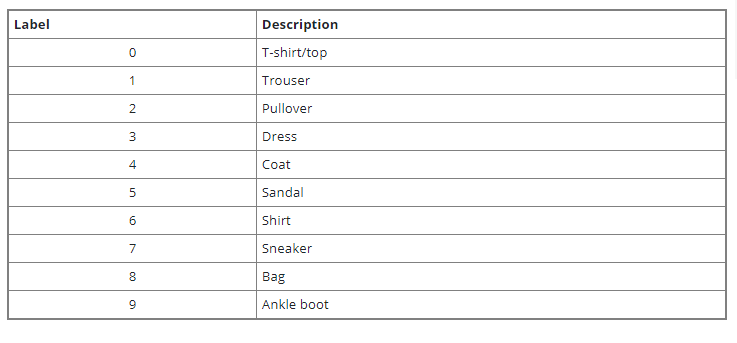